# Group Deku Project.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Royal car Dealers have a car yard.They mainly deal in selling new cars but want to make a shift to second hand dealership like other yards.Second hand cars have a huge market base.Many people consider buying used cars instead of a new ones due to their big difference in price points.There is a lack of information available to consumers about the relationship between used car prices and mileage. As a result, consumers may end uppaying more or less for a used car than it is actually worth, leading to financial losses or missed opportunities for savings. This problem disproportionately aects first-time car buyers or those with limited knowledge about the used car market.

> **Problem Statement:** The goal of this project is to predict the price of used cars given the feautures.

### b) Defining the Metric for Success

> Having a model that accurately  predicts used car prices.

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [3]:
#importing relevant libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import re
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Loading the Data 
# Dataset url = https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
car_details_df = pd.read_csv("Car details v3.csv")
car_df = car_details_df.copy()
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0




## 3. Data Understanding

In [5]:
# Determining the no. of records in our dataset
car_df.shape

(8128, 13)

In [6]:
# Previewing the bottom of our dataset
car_df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
# Exploring the descriptive statistics of the variables
car_df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
# Checking for data set info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [9]:
# Checking for Outliers
car_df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
90%,2018.000000,1.025000e+06,1.200000e+05,7.000000
95%,2019.000000,1.950000e+06,1.500000e+05,7.000000
99%,2019.000000,5.200000e+06,2.250000e+05,9.000000


In [10]:
# Identifying the Missing Data
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [11]:
# Dropping rows with Missing Data
car_df.dropna(inplace=True)

In [12]:
#Confirm if there are any missing values.
car_df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [13]:
# Identifying the Duplicated Data
car_df.duplicated().sum()

1189

In [14]:
#Dropping duplicated data.
car_df.drop_duplicates(inplace=True)

In [15]:
#Confirm if there are any duplicates.
car_df.duplicated().sum()

0

In [16]:
#checking the dimensions of the new data frame.
car_df.shape

(6717, 13)

In [17]:
# More data cleaning procedures
#creating a function that strips and converts non-numerical data types to numericals.
def replace_data(data, to_replace, value, col):
    """replace values in the given column"""
    car_df[col].replace(to_replace, value,inplace = True, regex = True)
replace_data(car_df, "CC", "", "engine")
car_df["engine"] = car_df["engine"].astype(float)

In [18]:
#calling our function.
replace_data(car_df, "km/kg", "", "mileage")
replace_data(car_df, "kmpl", "", "mileage")
car_df["mileage"] = car_df["mileage"].astype(float)

In [19]:
#calling our function.
replace_data(car_df, "bhp", "", "max_power")
car_df["max_power"] = car_df["max_power"].astype(float)

In [20]:
#striping torque
def findFirstFloat(string):
    return re.findall(r"[-+]?(?:\d*\.*\d+)", string)[0]

car_df["torque"] = car_df["torque"].apply(findFirstFloat)
car_df["torque"] = car_df["torque"].astype(float)

In [21]:
#spliting car brand
company_name = car_df['name'].apply(lambda x : x.split(' ')[0])
car_df.insert(1,"company_name",company_name)
car_df.drop(['name'],axis=1,inplace=True)

In [22]:
#create new column for "car age"
def yearTransform(year):
    return 2023 - year

#calling the function
car_df["year"] = car_df["year"].apply(yearTransform)

In [23]:
#confirming change of data types to floats.
car_df.dtypes

company_name      object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque           float64
seats            float64
dtype: object

In [24]:
#for x in ['km_driven']:
 #   q75,q25 = np.percentile(car_df.loc[:,x],[75,25])
  #  intr_qr = q75-q25
    
   # max= q75+(1.5*intr_qr)
    #min= q25-(1.5*intr_qr)
    
    #car_df.loc[car_df[x]  < min,x] = np.nan
    #car_df.loc[car_df[x]  > max,x] = np.nan

In [25]:
car_df.isnull().sum()

company_name     0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64



## 6. Exploratory Analysis

In [26]:
# plt.figure(figsize=[17,5])
# plt.subplot(1,3,1)
# sns.barplot(car_df['seller_type'], car_df['selling_price'])
# plt.title('selling Price Vs Seller Type')

# plt.subplot(1,3,2)
# sns.barplot(car_df['transmission'],car_df['selling_price'])
# plt.title('Selling Price Vs Transmission')

# plt.subplot(1,3,3)
# sns.barplot(car_df['fuel'],car_df['selling_price'])
# plt.title('Selling Price Vs Fuel Type')

# plt.show()

> 1.Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals and Trustmark Dealer * 
> - 2.It can be observed that Selling Price would be higher for cars that are Automatic. *
> - 3.Selling Price of cars with Fuel Type of Diesel is higher than Petrol, CNG and LPG. *

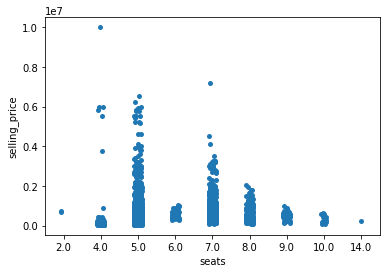

In [27]:
#correlation between selling_price and seats
sns.stripplot(data=car_df, x=car_df['seats'], y=car_df['selling_price']);

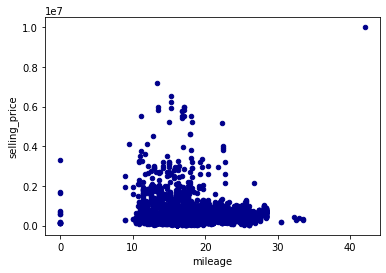

In [28]:
#correlation between selling price and mileage 
ax1 = car_df.plot.scatter(x='mileage',
                       y='selling_price',
                       c='DarkBlue')

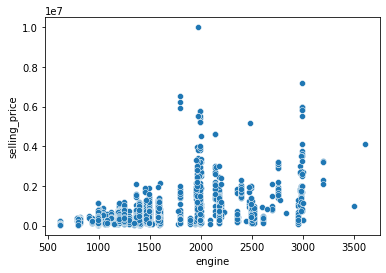

In [29]:
#correlation between engine and selling price
sns.scatterplot(data=car_df, x=car_df['engine'], y=car_df['selling_price']);

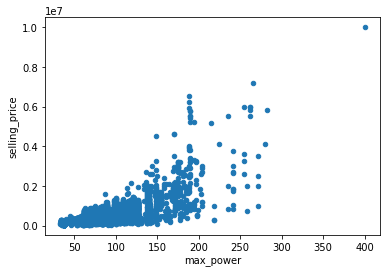

In [30]:
#correlation between maximum power and selling price
ax = car_df.plot.scatter(x='max_power', y='selling_price')

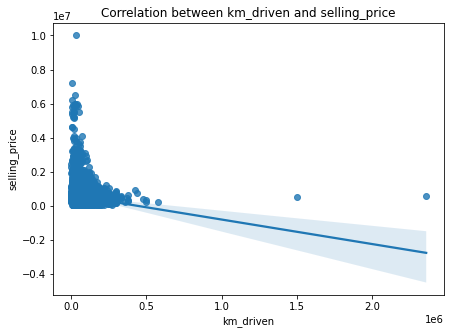

In [31]:
#Correlation between km_driven and selling_price
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between km_driven and selling_price')
sns.regplot(x='km_driven', y='selling_price',data=car_df);

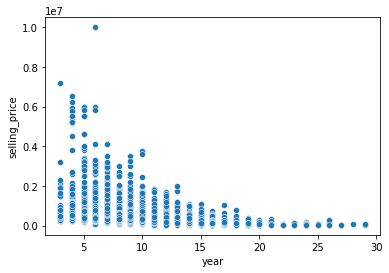

In [32]:
#correlation between model year and selling price
sns.scatterplot(data=car_df, x=car_df['year'], y=car_df['selling_price']);

Skewness: 5.570763
Kurtosis: 52.489968


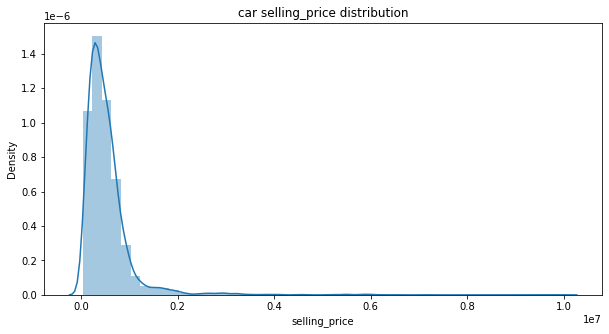

In [33]:
#checking for the distribution of the target variable
plt.figure(figsize=(10,5))

sns.distplot(car_df['selling_price'])
plt.title('car selling_price distribution')

print("Skewness: %f" % car_df['selling_price'].skew())
print("Kurtosis: %f" % car_df['selling_price'].kurt())

plt.show()

>We can see that the price distribution has a high positive skewness to the left (skew > 1). A kurtosis value of 52 indicates that the dataset contains a large number of outliers.

In [34]:
# catergorical column
car_df.head(4)

,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,9,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda,9,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda,17,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.7,5.0
3,Hyundai,13,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0


In [35]:
# creating initial dataframe
#cols = ["name","fuel","seller_type","transmission","seats","engine"]
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another colum
car_df['owner'] = labelencoder.fit_transform(car_df['owner'])
car_df['seller_type'] = labelencoder.fit_transform(car_df['seller_type'])
car_df['company_name'] = labelencoder.fit_transform(car_df['company_name'])
car_df['fuel'] = labelencoder.fit_transform(car_df['fuel'])
car_df['seller'] = labelencoder.fit_transform(car_df['seller_type'])
car_df['transmission'] = labelencoder.fit_transform(car_df['transmission'])
car_df['seats'] = labelencoder.fit_transform(car_df['seats'])
car_df['engine'] = labelencoder.fit_transform(car_df['engine'])
car_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_name   6717 non-null   int64  
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   int64  
 5   seller_type    6717 non-null   int64  
 6   transmission   6717 non-null   int64  
 7   owner          6717 non-null   int64  
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   int64  
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   float64
 12  seats          6717 non-null   int64  
 13  seller         6717 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 1.0 MB


## 7. Implementing the Solution

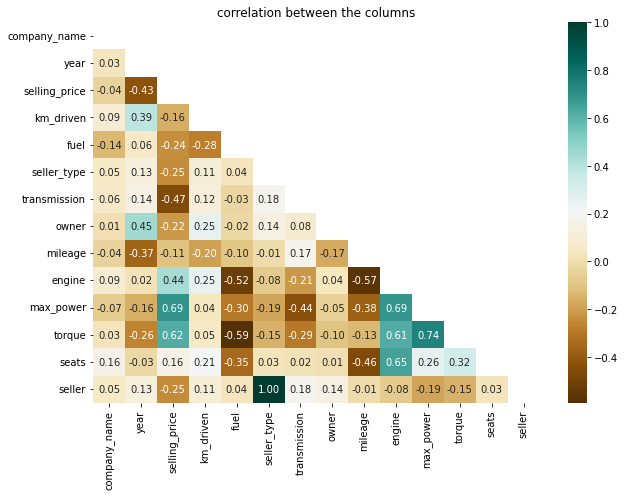

In [36]:
#correlation heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(car_df.corr(), dtype=bool))
sns.heatmap(car_df.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('correlation between the columns')
plt.show()

In [37]:
#creting model variables
y = car_df['selling_price']
#X_baseline = car_df.drop(labels=['selling_price','company_name','fuel','engine'],axis=1)
X_baseline = car_df.drop(labels=['selling_price'],axis=1)

In [38]:
car_df.head(3)

,company_name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,seller
0,20,9,450000,145500,1,1,1,0,23.40,24,74.00,190.0,2,1
1,26,9,370000,120000,1,1,1,2,21.14,47,103.52,250.0,2,1
2,10,17,158000,140000,3,1,1,4,17.70,46,78.00,12.7,2,1


In [39]:
# using statmodel
# use sm.add_constant(), to add constant term/y-intercept
X_pred = sm.add_constant(X_baseline)# we add constant to differentiate predictor from other features.

#building the model
model =  sm.OLS(y,X_pred) .fit()

#getting the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     928.9
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:16:33   Log-Likelihood:                -94693.
No. Observations:                6717   AIC:                         1.894e+05
Df Residuals:                    6704   BIC:                         1.895e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.587e+05   6.62e+04      6.928      0.000    3.29e+05    5.88e+05
company_name   962.0311    586.302      1.641      0.101    -187.307    2111.369
year         -3.271e+04   1397.039    -23.417      0.000   -3.55e+04      -3e+04
km_driven       -0.5837      0.078     -7.457      0.000      -0.737      -0.430
fuel         -8297.6882   6639.853     -1.250      0.211   -2.13e+04    4718.534
seller_type  -5.878e+04   6633.802     -8.860      0.000   -7.18e+04   -4.58e+04
transmission -3.084e+05   1.62e+04    -19.012      0.000    -3.4e+05   -2.77e+05
owner         -1.29e+04   3553.793     -3.631      0.000   -1.99e+04   -5938.324
mileage       1425.2555   1686.064      0.845      0.398   -1879.965    4730.476
engine         428.6384    314.365      1.364      0.173    -187.616    1044.893
max_power     7487.8300    250.580     29.882      0.000    6996.614    7979.046
torque         778.0617     81.513      9.545      0.000     618.270     937.853
seats        -4033.7240   5951.601     -0.678      0.498   -1.57e+04    7633.305
seller       -5.878e+04   6633.802     -8.860      0.000   -7.18e+04   -4.58e+04
==============================================================================
Omnibus:                     7548.709   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1378265.253
Skew:                           5.528   Prob(JB):                         0.00
Kurtosis:                      72.299   Cond. No.                     2.63e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.58e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
#standardizing numerical colums
#creting model variables
y = car_df['selling_price']
X = car_df.drop(labels=['selling_price','company_name','fuel','engine','seats','mileage'],axis=1)
#X = car_df.drop(labels=['selling_price','transmission','seller','company_name','fuel','seller_type','owner','seats'],axis=1)

In [41]:
cat_cols = ['transmission','seller','company_name','fuel','seller_type','owner','seats']
cat_df = car_df[cat_cols]

In [42]:
# standand scaling(subtract the men of the variable/the std deviation of the variable)

#including all the columns
X_predict_scaled = (X-np.mean(X))/np.std(X)
X_predict_scaled.head()

#checking the statisticall summary
X_predict_scaled.describe()

,year,km_driven,seller_type,transmission,owner,max_power,torque,seller
count,6.717000e+03,6.717000e+03,6.717000e+03,6.717000e+03,6.717000e+03,6.717000e+03,6.717000e+03,6.717000e+03
mean,-1.650211e-16,-5.289138e-17,8.303946e-17,-1.343441e-16,1.057828e-17,-2.496473e-16,2.031029e-16,8.303946e-17
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,-1.639384e+00,-1.250404e+00,-2.949457e+00,-3.268293e+00,-7.071789e-01,-1.732733e+00,-1.703219e+00,-2.949457e+00
25%,-8.695836e-01,-6.030494e-01,3.100860e-01,3.059701e-01,-7.071789e-01,-6.514713e-01,-7.078411e-01,3.100860e-01
50%,-9.978264e-02,-8.850825e-02,3.100860e-01,3.059701e-01,-7.071789e-01,-1.871277e-01,-1.621294e-01,3.100860e-01
75%,6.700183e-01,4.531884e-01,3.100860e-01,3.059701e-01,8.981340e-01,3.856574e-01,4.272393e-01,3.100860e-01
max,5.032224e+00,3.896254e+01,3.569629e+00,3.059701e-01,2.503447e+00,9.842759e+00,6.855724e+00,3.569629e+00


In [43]:
df = pd.concat([X_predict_scaled, cat_df], axis=1)
df

,year,km_driven,seller_type,transmission,owner,max_power,torque,seller,transmission,seller,company_name,fuel,seller_type,owner,seats
0,-0.099783,1.228331,0.310086,0.30597,-0.707179,-0.433958,0.318097,0.310086,1,1,20,1,1,0,2
1,-0.099783,0.793910,0.310086,0.30597,0.898134,0.496621,0.972951,0.310086,1,1,26,1,1,2,2
2,1.953020,1.134632,0.310086,0.30597,2.503447,-0.307863,-1.616997,0.310086,1,1,10,3,1,4,2
3,0.926619,0.913163,0.310086,0.30597,-0.707179,0.070421,-1.511129,0.310086,1,1,11,1,1,0,2
4,1.696420,0.793910,0.310086,0.30597,-0.707179,0.013678,-1.630094,0.310086,1,1,20,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,0.156818,-0.398616,0.310086,0.30597,0.898134,-0.651471,-0.773327,0.310086,1,1,20,3,1,2,2
8122,-0.099783,0.112467,0.310086,0.30597,0.898134,0.030386,0.642250,0.310086,1,1,11,1,1,2,2
8123,0.156818,0.623549,0.310086,0.30597,-0.707179,-0.154974,-0.514659,0.310086,1,1,11,3,1,0,2
8124,1.696420,0.776874,0.310086,0.30597,0.095478,0.700894,-1.493666,0.310086,1,1,11,1,1,1,2


In [44]:
#fit after standard scaling
#modeling
X_pred = sm.add_constant(X_predict_scaled)
#building the model
model2 =  sm.OLS(y,X_pred).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1589.
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:16:33   Log-Likelihood:                -94699.
No. Observations:                6717   AIC:                         1.894e+05
Df Residuals:                    6709   BIC:                         1.895e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.264e+05   3920.079    134.279      0.000    5.19e+05    5.34e+05
year         -1.284e+05   4829.804    -26.587      0.000   -1.38e+05   -1.19e+05
km_driven    -3.059e+04   4376.279     -6.990      0.000   -3.92e+04    -2.2e+04
seller_type  -1.806e+04   2031.383     -8.892      0.000    -2.2e+04   -1.41e+04
transmission -8.468e+04   4453.522    -19.015      0.000   -9.34e+04    -7.6e+04
owner        -1.586e+04   4424.668     -3.584      0.000   -2.45e+04   -7185.053
max_power      2.37e+05   6297.526     37.636      0.000    2.25e+05    2.49e+05
torque        8.238e+04   6067.928     13.577      0.000    7.05e+04    9.43e+04
seller       -1.806e+04   2031.383     -8.892      0.000    -2.2e+04   -1.41e+04
==============================================================================
Omnibus:                     7501.644   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1345330.297
Skew:                           5.471   Prob(JB):                         0.00
Kurtosis:                      71.463   Cond. No.                     4.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

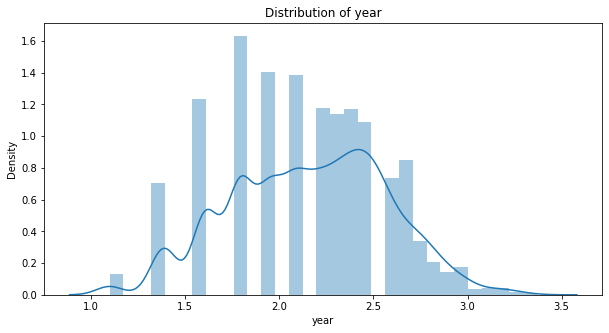

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(car_df['year']))
plt.title('Distribution of year')
plt.show()

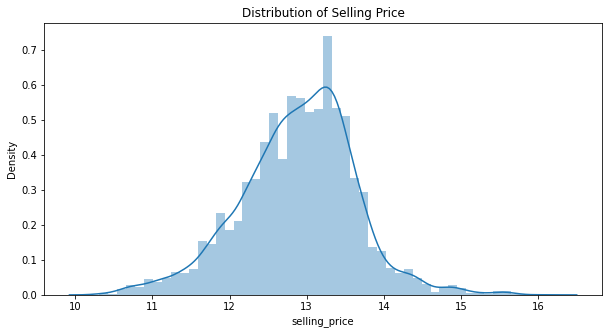

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(car_df['selling_price']))
plt.title('Distribution of Selling Price')
plt.show()

> Looking at the summary above,the regression line found was 

$$ \hat{sellingprice} = -4.856e+05 - 1.58e+04 maxpower $$
- 

In [47]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [48]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?